## Add Aero Forces

need to add aero moments to my aero model will do for a simple model and check result with previous method

### Preamble

In [1]:
import sympy as sym
import sympy.physics.mechanics as me
import pandas as pd
import seaborn as sns

import numpy as np
from scipy.integrate import odeint,LSODA,BDF,solve_ivp
import matplotlib.pyplot as plt

import sys, os

sys.path.insert(1, os.path.join(sys.path[0], '../..'))
import sympyTransforms as symt
import custom_plot_objects as cpo
import FwtModels as fm
import FwtModels.dof2 as dof2
import FwtModels.RollingModel as rm
import FwtModels.AeroModels as ams
import FwtModels.AssumedShapesNonLin as asnl

me.mechanics_printing()



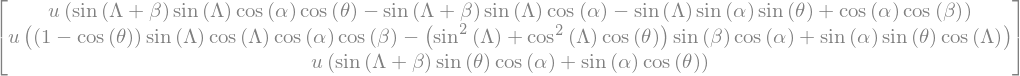

In [2]:
## a/c to wind transform
alpha,beta = me.dynamicsymbols(['alpha','beta'])
Ac_V = sym.rot_axis3(beta)*sym.rot_axis2(alpha)   # transform from a/c to the velocity frame 


## a/c to Hinge transform
Lambda,theta = me.dynamicsymbols(['Lambda','theta'])


H_Ac = sym.trigsimp(sym.rot_axis3(-Lambda)*\
                    sym.rot_axis1(theta)*  \
                    sym.rot_axis3(Lambda))        # transform from a/c to the hinge frame 


H_V = sym.trigsimp(H_Ac*Ac_V)                      # transform from velocity to hinge reference frame

# Velocity vector in velocity frame is of the form [v 0 0]
u = sym.Symbol('u')
Vv = sym.Matrix([u,0,0])

# Transform into the hinge reference frame
Vh = H_V * Vv
Vh

In [17]:
sym.print_python(Vh)

u = Symbol('u')
t = Symbol('t')
alpha = Function('alpha')
theta = Function('theta')
e = ImmutableDenseMatrix([[u*(sin(Lambda(t) + beta(t))*sin(Lambda(t))*cos(alpha(t))*cos(theta(t)) - sin(Lambda(t) + beta(t))*sin(Lambda(t))*cos(alpha(t)) - sin(Lambda(t))*sin(alpha(t))*sin(theta(t)) + cos(alpha(t))*cos(beta(t)))], [u*((1 - cos(theta(t)))*sin(Lambda(t))*cos(Lambda(t))*cos(alpha(t))*cos(beta(t)) - (sin(Lambda(t))**2 + cos(Lambda(t))**2*cos(theta(t)))*sin(beta(t))*cos(alpha(t)) + sin(alpha(t))*sin(theta(t))*cos(Lambda(t)))], [u*(sin(Lambda(t) + beta(t))*sin(theta(t))*cos(alpha(t)) + sin(alpha(t))*cos(theta(t)))]])


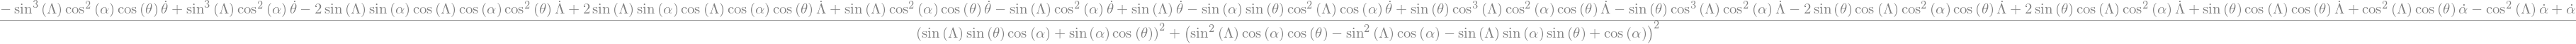

In [8]:


sym.simplify(alpha.diff(me.dynamicsymbols._t))